# Project Work

* Exercice 01: use the function below to generate some data, and train a neural network that predicts the two classes from the spiral data (see below). A few tipps

  *   Use nn.BCEWithLogitsLoss() as loss criterion (It is[ more stable than](https://github.com/pytorch/pytorch/issues/39435#issuecomment-639386421)  BCELoss()),
  *  Where SGD as optimizer fails, Adam may still be successful
  *  Where some learning rates fail, others may still help you converge
  *  Because you are classifying a binary dataset, you will need sigmoid to convert logits to probabilities at some point in the process
  * The following [picture](https://cs231n.github.io/assets/nn3/learningrates.jpeg) and [picture](https://cs231n.github.io/assets/nn3/accuracies.jpeg) give you rough indication about how well the training process is going. For details, see the comments available [here](https://cs231n.github.io/neural-networks-3/#gradcheck)

* Exercice 02: Think about at least two examples, were predictive machine learning could be useful as a component in your own scenario

The notebook is to get started with the basics only (e.g. important notions such as regularization and weight decay are not introduced).

Happy coding!

## Exercise 1

### 1.1 Setup

In [22]:
#!pip install matplotlib torch
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

### 1.2 Generate Data

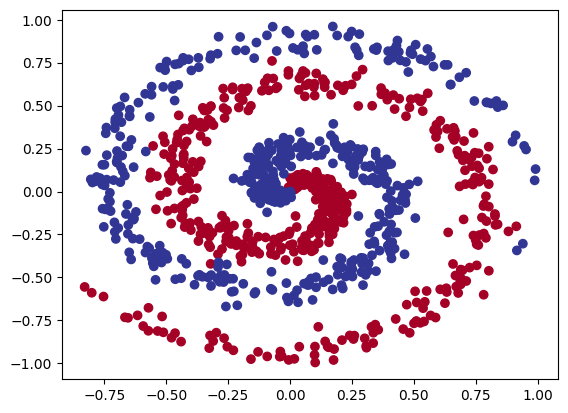

(torch.Size([1000, 2]), torch.Size([1000]))

In [20]:
# Generate binary spiral data
def generate_spiral_data(points_per_class=500):
    X = np.zeros((points_per_class * 2, 2), dtype=np.float32)
    y = np.zeros(points_per_class * 2, dtype=np.float32)
    for j in range(2):
        ix = range(points_per_class * j, points_per_class * (j + 1))
        r = np.linspace(0.0, 1, points_per_class)
        t = np.linspace(j * 4, (j + 1) * 4, points_per_class) + np.random.randn(points_per_class) * 0.2
        X[ix] = np.c_[r * np.sin(t * 2.5), r * np.cos(t * 2.5)]
        y[ix] = j
    plt.scatter(X[:, 0], X[:, 1], c = y, cmap=plt.cm.RdYlBu) # for alternative color palettes, see https://matplotlib.org/stable/users/explain/colors/colormaps.html#qualitative
    plt.show()
    return torch.from_numpy(X), torch.from_numpy(y)

inputs, targets = generate_spiral_data()
inputs.shape, targets.shape

NeuralNetwork(
  (fc): Sequential(
    (0): Linear(in_features=2, out_features=100, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=100, out_features=100, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=100, out_features=1, bias=True)
  )
)
Epoch 1/500, Loss: 11.5018
Epoch 10/500, Loss: 11.1630
Epoch 20/500, Loss: 11.0966
Epoch 30/500, Loss: 11.0876
Epoch 40/500, Loss: 11.0867
Epoch 50/500, Loss: 11.0863
Epoch 60/500, Loss: 11.0863
Epoch 70/500, Loss: 11.0866
Epoch 80/500, Loss: 11.0856
Epoch 90/500, Loss: 11.0861
Epoch 100/500, Loss: 11.0856
Epoch 110/500, Loss: 11.0848
Epoch 120/500, Loss: 11.0845
Epoch 130/500, Loss: 11.0846
Epoch 140/500, Loss: 11.0843
Epoch 150/500, Loss: 11.0839
Epoch 160/500, Loss: 11.0839
Epoch 170/500, Loss: 11.0837
Epoch 180/500, Loss: 11.0835
Epoch 190/500, Loss: 11.0829
Epoch 200/500, Loss: 11.0825
Epoch 210/500, Loss: 11.0825
Epoch 220/500, Loss: 11.0829
Epoch 230/500, Loss: 11.0824
Epoch 240/500, Loss: 11.0819
Epoch 250/500, Loss: 11.0

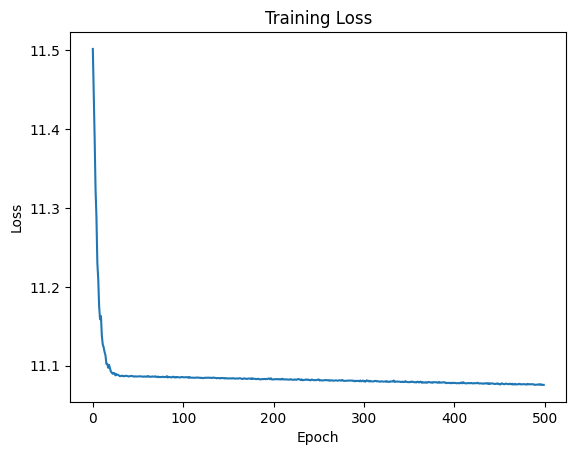

In [54]:
# Define the model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc = nn.Sequential(
            nn.Linear(2, 100),
            nn.Sigmoid(), 
            #nn.ReLU(),
            nn.Linear(100, 100),
            nn.Sigmoid(),
            #nn.ReLU(),
            nn.Linear(100, 1))

    def forward(self, x):
        return self.fc(x)
    

def show_loss(losses):
  # plotting the loss evolution during training
  plt.plot(losses)
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.title('Training Loss')
  plt.show()

# Training function
def train_model(model, inputs, targets, epochs=200, batch_size=64):

    losses = []

    dataset = torch.utils.data.TensorDataset(inputs, targets) # https://docs.pytorch.org/docs/stable/data.html
    dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

    # print the model
    print(model)

    # loss function
    #bce = nn.MSELoss()  
    bce = nn.BCEWithLogitsLoss()

    # optimizer algorithm
    optimizer = optim.SGD(model.parameters(), lr=0.001)  # alternative: adam

    for epoch in range(epochs):

        model.train() # signal that we are in training mode - should be added after each epoch
        total_loss = 0.0

        for batch_inputs, batch_targets in dataloader:
            optimizer.zero_grad() # clear the gradients of all optimized tensors

            # forward pass: compute predicted targets by passing inputs to the model
            outputs = model(batch_inputs).squeeze()

            # loss: compute loss according to the selected loss function
            loss = bce(outputs, batch_targets)

            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()

            # call the step function on an Optimizer to make an update of weights and biases
            optimizer.step()

            total_loss += loss.item()

        # save loss values for plotting
        losses.append(total_loss)
        if (epoch + 1) % 10 == 0 or epoch == 0:
            print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss:.4f}")

    show_loss(losses)
    #path = "my_torch_model16052025.pt"
    #torch.save(model.state_dict(), path)

# Train the model
model = NeuralNetwork()
train_model(model, inputs, targets, epochs=500)

Mean error: 0.5000


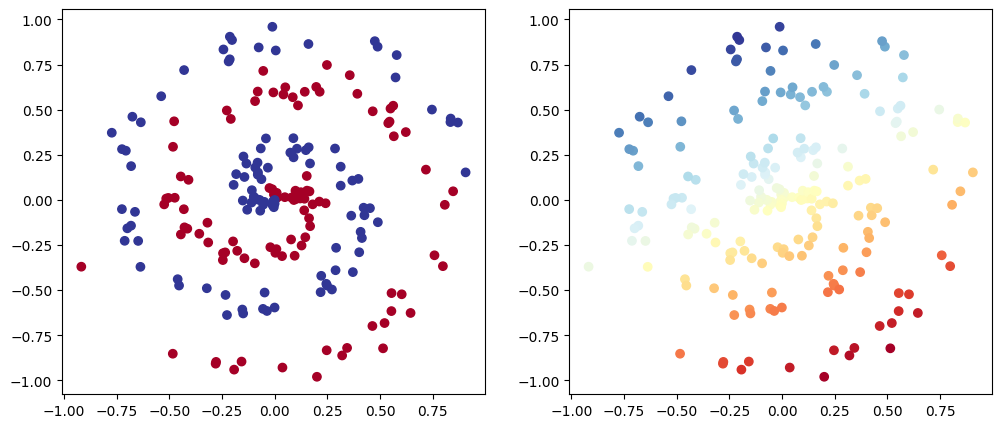

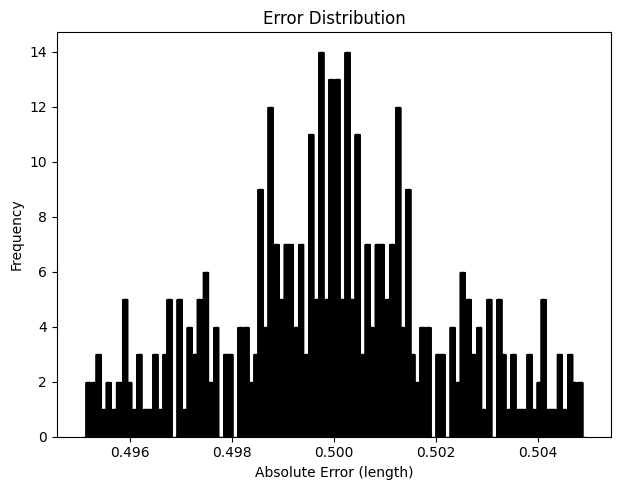

In [55]:
# evaluate the model using new examples
def evaluate_model(model, points_per_class=100):

    # generate new unseen data
    X = np.zeros((points_per_class * 2, 2), dtype=np.float32)
    y = np.zeros(points_per_class * 2, dtype=np.float32)

    for j in range(2):
        ix = range(points_per_class * j, points_per_class * (j + 1))
        r = np.linspace(0.0, 1, points_per_class)
        t = np.linspace(j * 4, (j + 1) * 4, points_per_class) + np.random.randn(points_per_class) * 0.2
        X[ix] = np.c_[r * np.sin(t * 2.5), r * np.cos(t * 2.5)]
        y[ix] = j

    input = torch.from_numpy(X)
    pred_y = model(input).detach().numpy()
    pred_y = 1 / (1 + np.exp(-pred_y))  # Apply sigmoid to logits

    # compute (mean) errors
    error = np.abs(pred_y - y)

    print(f"Mean error: {np.mean(error):.4f}")

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.scatter(X[:, 0], X[:, 1], c = y, cmap=plt.cm.RdYlBu) 

    plt.subplot(1, 2, 2)
    plt.scatter(X[:, 0], X[:, 1], c = pred_y, cmap=plt.cm.RdYlBu) 
    plt.show()
    
    # error histograms
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.hist(error, bins=50, edgecolor='black')
    plt.title('Error Distribution')
    plt.xlabel('Absolute Error (length)')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()
    
evaluate_model(model)